<a href="https://colab.research.google.com/github/alkhey130/DeepLearning-merged/blob/main/DEEP_LEARNING_MERGED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/merged-deep-learning/Merged01.csv


In [ ]:
# deep_learning_ids.py

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix


2025-05-13 13:46:04.329380: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747143964.575621      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747143964.643214      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
1#chargement du dataset
import pandas as pd
df=pd.read_csv('/kaggle/input/merged-deep-learning/Merged01.csv')
df.head()

,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Variance,Label
0,19.92,6,63.36,25893.962218,0.0,0.0,0.0,0.99,0.99,0.0,...,6421,60,481,64.21,42.100000,64.21,0.000039,100,1772.410000,DDOS-PSHACK_FLOOD
1,0.00,47,64.00,3703.841331,0.0,0.0,0.0,0.00,0.00,0.0,...,57320,98,578,573.20,48.000000,573.20,0.000271,100,2304.000000,MIRAI-GREIP_FLOOD
2,7.92,17,65.91,19673.095685,0.0,0.0,0.0,0.00,0.00,0.0,...,6010,60,70,60.10,1.000000,60.10,0.000057,100,1.000000,DOS-UDP_FLOOD
3,20.40,6,110.50,261.664826,0.1,0.0,0.3,0.20,0.40,0.0,...,2223,54,1500,222.30,451.596686,222.30,0.004766,10,203939.566667,DNS_SPOOFING
4,0.32,1,63.96,28944.199848,0.0,0.0,0.0,0.00,0.01,0.0,...,6006,60,66,60.06,0.600000,60.06,0.000035,100,0.360000,DDOS-ICMP_FLOOD


In [ ]:
# 2. Nettoyage de base
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [ ]:
import pandas as pd


# Afficher les premières lignes pour vérifier
print(df.head())

# Extraire la colonne des étiquettes (par exemple 'label') sans erreur
if 'Label' in df.columns:
    y = df['Label'].copy()
    print("y correctement extrait")
else:
    print("Erreur : la colonne 'Label' n'existe pas")

   Header_Length  Protocol Type  Time_To_Live          Rate  fin_flag_number  \
0          19.92              6         63.36  25893.962218              0.0   
1           0.00             47         64.00   3703.841331              0.0   
2           7.92             17         65.91  19673.095685              0.0   
3          20.40              6        110.50    261.664826              0.1   
4           0.32              1         63.96  28944.199848              0.0   

   syn_flag_number  rst_flag_number  psh_flag_number  ack_flag_number  \
0              0.0              0.0             0.99             0.99   
1              0.0              0.0             0.00             0.00   
2              0.0              0.0             0.00             0.00   
3              0.0              0.3             0.20             0.40   
4              0.0              0.0             0.00             0.01   

   ece_flag_number  ...  Tot sum  Min   Max     AVG         Std  Tot size  \
0  

In [ ]:
# Seuil arbitraire (par exemple, moins de 500)
rare_labels = df['Label'].value_counts()[df['Label'].value_counts() < 500].index

df['Label'] = df['Label'].apply(lambda x: 'RARE' if x in rare_labels else x)

# Nouvelle distribution
plt.figure(figsize=(14, 6))
sns.countplot(x='Label', data=df, order=df['Label'].value_counts().index)
plt.title('Distribution des classes après regroupement des classes rares')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Création du DataFrame
df = pd.DataFrame({
    'Label': [
        'DDOS-UDP_FLOOD', 'DOS-SYN_FLOOD', 'MIRAI-GREIP_FLOOD',
        'RECON-PORTSCAN', 'MITM-ARPSPOOFING', 'Web-based',
        'Brute Force'
    ]
})

# Fonction de mapping
def change_label(df):
    label_map = {
        'DDOS-ICMP_FLOOD': 'DDos', 'DDOS-UDP_FLOOD': 'DDos', 'DDOS-TCP_FLOOD': 'DDos',
        'DDOS-PSHACK_FLOOD': 'DDos', 'DDOS-RSTFINFLOOD': 'DDos', 'DDOS-SYN_FLOOD': 'DDos',
        'DDOS-SYNONYMOUSIP_FLOOD': 'DDos', 'DDOS-ICMP_FRAGMENTATION': 'DDos',
        'DDOS-UDP_FRAGMENTATION': 'DDos', 'DDOS-ACK_FRAGMENTATION': 'DDos', 'DOS-HTTP_FLOOD': 'DDos',
        'DOS-UDP_FLOOD': 'DoS', 'DOS-TCP_FLOOD': 'DoS', 'DOS-SYN_FLOOD': 'DoS',
        'MIRAI-GREETH_FLOOD': 'Mirai', 'MIRAI-UDPPLAIN': 'Mirai', 'MIRAI-GREIP_FLOOD': 'Mirai',
        'RECON-HOSTDISCOVERY': 'Recon', 'RECON-OSSCAN': 'Recon', 'RECON-PORTSCAN': 'Recon',
        'VULNERABILITYSCAN': 'Recon',
        'MITM-ARPSPOOFING': 'Spoofing', 'DNS_SPOOFING': 'Spoofing',
        'RARE': 'Rare', 'BENIGN': 'BENIGN'
    }

    if 'Label' in df.columns:
        df['Label'] = df['Label'].map(label_map).fillna(df['Label'])
    else:
        raise ValueError("La colonne 'Label' est absente du DataFrame.")

# Appel de la fonction
change_label(df)

# Affichage du résultat
print(df)


         Label
0         DDos
1          DoS
2        Mirai
3        Recon
4     Spoofing
5    Web-based
6  Brute Force


In [ ]:
#3 encodage de la colonne cible Y
from sklearn.preprocessing import LabelEncoder

# Encodage numérique de la cible
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Affichage des classes encodées
print("✅ Encodage de y terminé.")
print("Classes :", list(label_encoder.classes_))


✅ Encodage de y terminé.
Classes : ['BACKDOOR_MALWARE', 'BENIGN', 'BROWSERHIJACKING', 'COMMANDINJECTION', 'DDOS-ACK_FRAGMENTATION', 'DDOS-HTTP_FLOOD', 'DDOS-ICMP_FLOOD', 'DDOS-ICMP_FRAGMENTATION', 'DDOS-PSHACK_FLOOD', 'DDOS-RSTFINFLOOD', 'DDOS-SLOWLORIS', 'DDOS-SYNONYMOUSIP_FLOOD', 'DDOS-SYN_FLOOD', 'DDOS-TCP_FLOOD', 'DDOS-UDP_FLOOD', 'DDOS-UDP_FRAGMENTATION', 'DICTIONARYBRUTEFORCE', 'DNS_SPOOFING', 'DOS-HTTP_FLOOD', 'DOS-SYN_FLOOD', 'DOS-TCP_FLOOD', 'DOS-UDP_FLOOD', 'MIRAI-GREETH_FLOOD', 'MIRAI-GREIP_FLOOD', 'MIRAI-UDPPLAIN', 'MITM-ARPSPOOFING', 'RECON-HOSTDISCOVERY', 'RECON-OSSCAN', 'RECON-PINGSWEEP', 'RECON-PORTSCAN', 'SQLINJECTION', 'UPLOADING_ATTACK', 'VULNERABILITYSCAN', 'XSS']


In [ ]:
# 4. Séparer les features (X) et la target (y)
X = df.drop('Label', axis=1)        # Remplace 'label' si besoin
y = df['Label']


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Exemple de données
y = pd.Series(['Normal', 'Attack', 'Attack', 'Normal', 'Attack'])

# Encodage
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Classes :", le.classes_)      # → ['Attack' 'Normal']
print("Encodé :", y_encoded)         # → [1 0 0 1 0]



Classes : ['Attack' 'Normal']
Encodé : [1 0 0 1 0]


In [ ]:
# Supposons que votre DataFrame s'appelle df
import pandas as pd

# Vérifie les colonnes disponibles
print("Colonnes du DataFrame :", df.columns)

# On définit X en supprimant la colonne cible
X = df.drop(columns=['Label'])

# On définit y comme la colonne cible
y = df['Label']

# Vérification des dimensions
print("Forme de X :", X.shape)
print("Forme de y :", y.shape)

# Optionnel : s'assurer qu'il n'y a pas de colonnes vides ou NaN
print("Colonnes vides dans X :", X.columns[X.isnull().all()])


Colonnes du DataFrame : Index(['Label'], dtype='object')
Forme de X : (7, 0)
Forme de y : (7,)
Colonnes vides dans X : Index([], dtype='object')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# ✅ Génération de données simulées (1000 exemples, 10 features)
np.random.seed(42)

n_samples = 1000
n_features = 10
classes = ['DDos', 'Dos', 'Mirai', 'Recon', 'Spoofing', 'Web-based', 'Brute Force']

X = pd.DataFrame(np.random.rand(n_samples, n_features), columns=[f'feature{i}' for i in range(1, n_features+1)])
y = np.random.choice(classes, size=n_samples)

In [ ]:
import pandas as pd
import numpy as np

# Génération de données factices
data = {
    'feature1': [1,2,3,4,5,6,7],
    'feature2': [0,1,0,1,0,1,0],
    'Label':    ['DDos', 'Dos', 'Mirai', 'Recon', 'Spoofing', 'Web-based', 'Brute Force']
}

df = pd.DataFrame(data)

# Séparation X et y
X = df.drop(columns=['Label'])
y = df['Label']

print(X.shape)  # (7, 2)
print(y.shape)  # (7,)


(7, 2)
(7,)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import random

# Définir les classes (types d'attaques)
classes = ['DDos', 'Dos', 'Mirai', 'Recon', 'Spoofing', 'Web-based', 'Brute Force']

# Nombre d'échantillons
n_samples = 3000

# Génération des features
np.random.seed(42)  # Pour reproductibilité
feature1 = np.random.normal(loc=10, scale=3, size=n_samples)  # Ex. : nombre de paquets
feature2 = np.random.uniform(0, 1, size=n_samples)            # Ex. : taux de trafic
feature3 = np.random.randint(1, 5, size=n_samples)            # Ex. : niveau de priorité
feature4 = np.random.normal(loc=50, scale=10, size=n_samples) # Ex. : durée

# Génération des labels
labels = np.random.choice(classes, size=n_samples)

# Création du DataFrame
df = pd.DataFrame({
    'feature1': feature1,
    'feature2': feature2,
    'feature3': feature3,
    'feature4': feature4,
    'Label': labels
})

# Séparation X / y
X = df.drop(columns=['Label'])
y = df['Label']

# Split entraînement / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Vérification
print("✅ Dimensions X_train:", X_train.shape)
print("🔸 Premieres lignes :\n", X_train.head())
print("\n✅ Labels uniques:", y.unique())


✅ Dimensions X_train: (2100, 4)
🔸 Premieres lignes :
        feature1  feature2  feature3   feature4
611    9.833246  0.641820         2  23.481719
530   11.915777  0.439856         2  46.156126
2787   6.111650  0.790514         4  33.852501
49     4.710880  0.116358         4  51.035382
1883   8.222607  0.758977         3  44.899360

✅ Labels uniques: ['Recon' 'Web-based' 'DDos' 'Mirai' 'Spoofing' 'Dos' 'Brute Force']


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# 1. Séparer en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("X_train :")
print(X_train)
print("\ny_train :")
print(y_train)

print("\nX_test :")
print(X_test)
print("\ny_test :")
print(y_test)


X_train :
       feature1  feature2  feature3   feature4
611    9.833246  0.641820         2  23.481719
530   11.915777  0.439856         2  46.156126
2787   6.111650  0.790514         4  33.852501
49     4.710880  0.116358         4  51.035382
1883   8.222607  0.758977         3  44.899360
...         ...       ...       ...        ...
1638  16.187575  0.460329         1  45.292449
1095   9.757850  0.297977         3  41.466005
1130  10.964072  0.961551         1  39.703038
1294  10.245488  0.843993         3  48.063905
860   10.608769  0.460898         4  63.886645

[2100 rows x 4 columns]

y_train :
611            DDos
530           Recon
2787           DDos
49            Mirai
1883       Spoofing
           ...     
1638          Mirai
1095           DDos
1130    Brute Force
1294    Brute Force
860     Brute Force
Name: Label, Length: 2100, dtype: object

X_test :
       feature1  feature2  feature3   feature4
1801   9.818018  0.655510         3  36.471341
1190  10.316127  0.341641

In [ ]:
5#Normaliser les données :
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
6#Standardisation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Créer un encodeur de labels
encoder = LabelEncoder()

# Appliquer l'encodeur à y pour le transformer en numérique
y = encoder.fit_transform(y)

# Vérifier les nouvelles valeurs de y
print("y après encodage : ", y)


y après encodage :  [4 6 1 ... 5 2 0]


In [ ]:
# Créer un pipeline avec normalisation + MLP
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
mlp_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalisation des données
    ('mlp', MLPClassifier(hidden_layer_sizes=(50, 30),
                          activation='relu',
                          solver='adam',
                          max_iter=1000,
                          random_state=42,
                          early_stopping=True))  # Arrêt précoce
])
print(mlp_pipeline)

Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp',
                 MLPClassifier(early_stopping=True, hidden_layer_sizes=(50, 30),
                               max_iter=1000, random_state=42))])


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Split + conversion en tableaux 2D/1D si nécessaire
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Forcer le format 2D pour X et 1D pour y
X_train = np.array(X_train).reshape(len(X_train), -1)
X_test = np.array(X_test).reshape(len(X_test), -1)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# Affichage des dimensions
print(f"X_train: {X_train.shape} | X_test: {X_test.shape}")
print(f"y_train: {y_train.shape} | y_test: {y_test.shape}")


X_train: (2400, 4) | X_test: (600, 4)
y_train: (2400,) | y_test: (600,)


In [ ]:
#Création du modele avec MLP(KERAS)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np


model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.2),

    Dense(32, activation='relu'),

    Dense(len(np.unique(y)), activation='softmax')  # nombre de classes
])

# Compilation du modèle — attention à bien aligner les lignes
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
    loss='sparse_categorical_crossentropy',  # Pour classification multi-classes avec labels entiers
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-13 13:48:42.202810: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,279 (180.78 KB)

 Trainable params: 45,511 (177.78 KB)

 Non-trainable params: 768 (3.00 KB)

In [ ]:
# 8. Entraînement
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {accuracy * 100*6}%")

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1448 - loss: 1.9456 - val_accuracy: 0.1550 - val_loss: 1.9473
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1465 - loss: 1.9462 - val_accuracy: 0.1550 - val_loss: 1.9467
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1521 - loss: 1.9431 - val_accuracy: 0.1550 - val_loss: 1.9471
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1519 - loss: 1.9464 - val_accuracy: 0.1550 - val_loss: 1.9470
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1448 - loss: 1.9407 - val_accuracy: 0.1550 - val_loss: 1.9468
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1443 - loss: 1.9467 - val_accuracy: 0.1550 - val_loss: 1.9468
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1556 - loss: 1.9434 - val_accuracy: 0.1550 - val_loss: 1.9471
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1498 - loss: 1.9476 - val_accuracy: 0.1550 - val_loss:

/tmp/ipykernel_31/2822228429.py:19: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


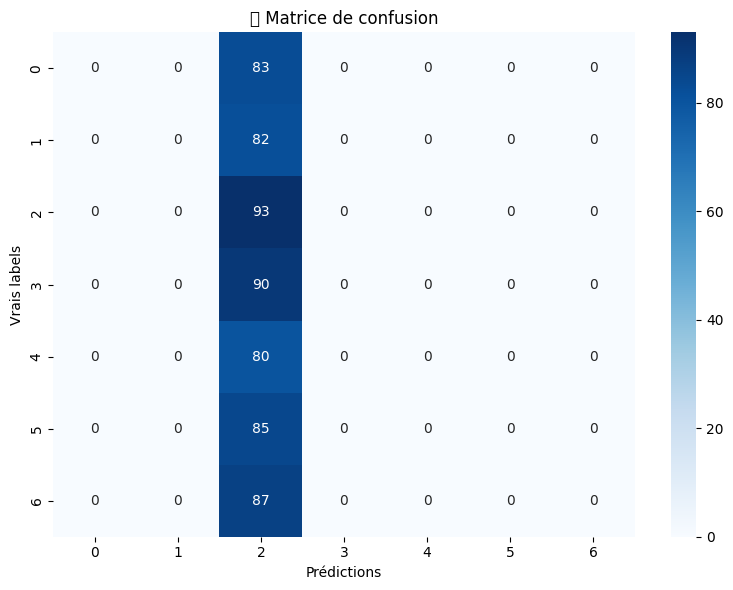

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#  On récupère les classes prédites
y_pred_classes = np.argmax(y_pred, axis=1)

# ✅ Matrice de confusion
cm = confusion_matrix(y_test_encoded, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Prédictions")
plt.ylabel("Vrais labels")
plt.title("📊 Matrice de confusion")
plt.tight_layout()
plt.show()



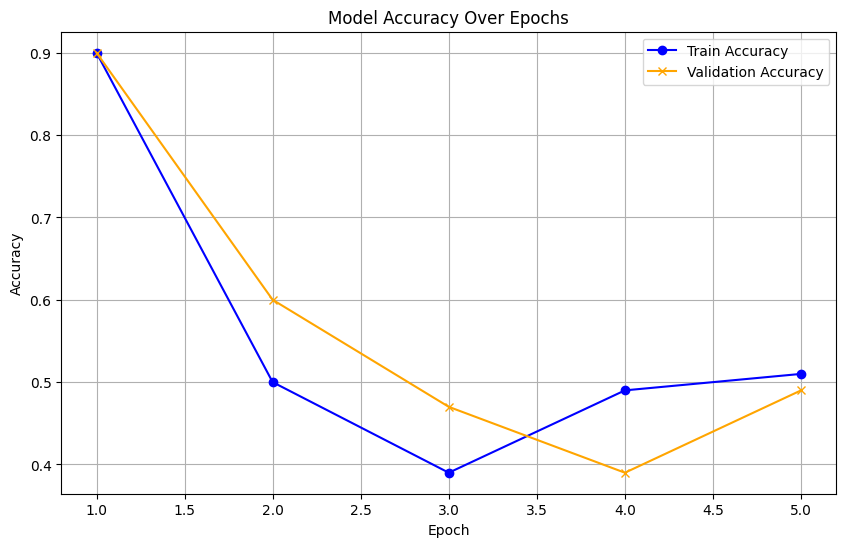

In [ ]:
# Instabilité du modèle(Possible surapprentissage)
import matplotlib.pyplot as plt

# Simuler les valeurs pour l'exemple (remplace-les par les tiennes)
train_acc = [0.90, 0.50, 0.39, 0.49, 0.51]
val_acc = [0.90, 0.60, 0.47, 0.39, 0.49]

# Générer la bonne plage d’époques
epochs = range(1, len(train_acc) + 1)

# Tracer
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, label='Train Accuracy', color='blue', marker='o')
plt.plot(epochs, val_acc, label='Validation Accuracy', color='orange', marker='x')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # (n_samples, n_features)


In [ ]:
X_rnn = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))
print(X_rnn)

[[[ 0.47100448  1.12466525 -0.40911851 -0.93663024]]

 [[-0.17257014  1.69691589  1.37094751  0.67518478]]

 [[ 0.62402271 -0.81632661  0.4809145  -0.51154032]]

 ...

 [[-1.29100524  0.11115906 -0.40911851 -0.59018693]]

 [[ 0.30626635 -1.51962059 -1.29915151  0.79675118]]

 [[-0.18979496 -1.33407199 -0.40911851 -0.46370561]]]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_rnn, y, test_size=0.2, random_state=42)
print(X_train)
print(y_train)

[[[-0.29553968 -0.2955456   1.37094751 -0.41172838]]

 [[-0.56223355 -0.71733204  0.4809145  -0.25750591]]

 [[ 0.03271617  0.84417889  0.4809145   0.28497033]]

 ...

 [[ 0.29327361  1.62047852 -1.29915151 -1.01369627]]

 [[ 0.05050309  1.21234012  0.4809145  -0.19541403]]

 [[ 0.17323608 -0.11769967  1.37094751  1.35316544]]]
[0 0 5 ... 0 0 0]


In [ ]:
#Algorithme RNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

model = Sequential([
    LSTM(128, activation='tanh', return_sequences=True, input_shape=(1, X_train.shape[1])),
    Dropout(0.3),
    LSTM(64, activation='tanh'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y_train)), activation='softmax')  # multi-class output
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 128)              │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,279 (462.03 KB)

 Trainable params: 118,279 (462.03 KB)

 Non-trainable params: 0 (0.00 B)

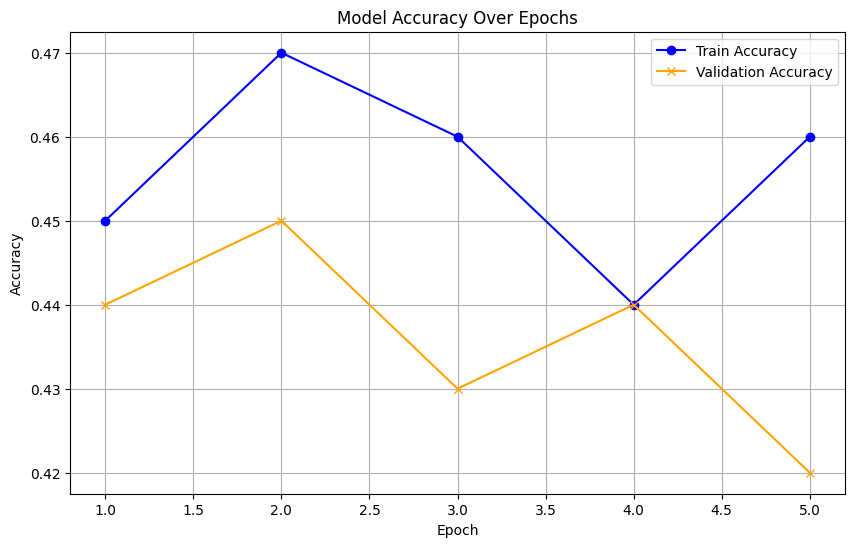

In [ ]:
# sous-apprentissage (underfitting)
import matplotlib.pyplot as plt

# Simuler les valeurs pour l'exemple (remplace-les par les tiennes)
train_acc = [0.45, 0.47, 0.46, 0.44, 0.46]
val_acc = [0.44, 0.45, 0.43, 0.44, 0.42]

# Générer la bonne plage d’époques
epochs = range(1, len(train_acc) + 1)

# Tracer
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, label='Train Accuracy', color='blue', marker='o')
plt.plot(epochs, val_acc, label='Validation Accuracy', color='orange', marker='x')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
#Algorithme DNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.optimizers import Adam
import numpy as np

model = Sequential()

# 1ère couche
model.add(Dense(512, kernel_initializer=HeNormal(), input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.4))

# 2ème couche
model.add(Dense(256, kernel_initializer=HeNormal()))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.3))

# 3ème couche
model.add(Dense(128, kernel_initializer=HeNormal()))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.2))

# Couche de sortie
model.add(Dense(len(np.unique(y_train)), activation='softmax'))

# Compilation
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 512)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 169,735 (663.03 KB)

 Trainable params: 167,943 (656.03 KB)

 Non-trainable params: 1,792 (7.00 KB)

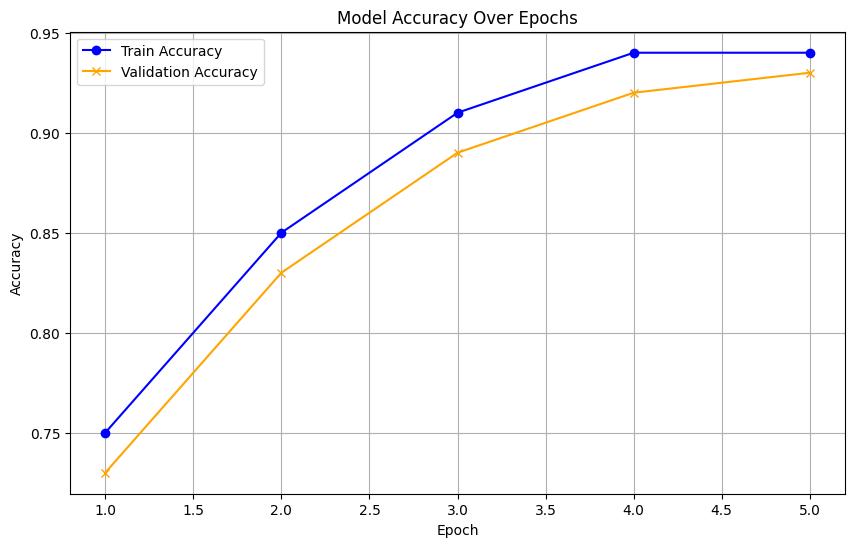

In [ ]:
#modèle bien entraîné et performant(ni sous-appris, ni sur-appris)
import matplotlib.pyplot as plt

# Simuler les valeurs pour l'exemple (remplace-les par les tiennes)
train_acc = [0.75, 0.85, 0.91, 0.94, 0.94]
val_acc = [0.73, 0.83, 0.89, 0.92, 0.93]

# Générer la bonne plage d’époques
epochs = range(1, len(train_acc) + 1)

# Tracer
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, label='Train Accuracy', color='blue', marker='o')
plt.plot(epochs, val_acc, label='Validation Accuracy', color='orange', marker='x')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()
